<a href="https://colab.research.google.com/github/aqilaqsa/Artificial-Intelligence/blob/main/sentiment_analysis_vaksin_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#f8d7da; color:black; padding:20px; font-family:Arial, sans-serif; border-radius:15px; text-align:center;">
    <span style="font-size:32px; font-weight:bold;">Sentiment Analysis</span>
</div>

- Dataset bisa didownload dari classroom
- Lakukan EDA
- Preprocessing
- Training model
- Lakukan Hyperparameter tunning
- Lakukan Evaluasi

<div style="background-color: thistle; color:black; padding:20px; font-family:Arial, sans-serif; border-radius:15px; text-align:center;">
    <span style="font-size:32px; font-weight:bold;">Exploratory Data Analysis</span>
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
data = pd.read_csv('vaksinasi_pandemi_covid_surabaya.csv')

In [ ]:
# Display the first few rows of the dataframe
data.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Dec 04 14:38:54 +0000 2023,1731684506078228874,Plissss lah Masa w ke surabaya pas covid mulu dah,0,0,0,1,in,1274742535768834048,1731684506078228874,lillkickity,https://twitter.com/lillkickity/status/1731684...
1,Sun Dec 03 22:33:34 +0000 2023,1731441575648251904,@dayroraxy @Widino Mutiara yang enak di keluar...,0,0,0,0,in,1657374011414937601,1731241963033358710,Abiiiii789,https://twitter.com/Abiiiii789/status/17314415...
2,Sun Dec 03 13:21:32 +0000 2023,1731302651290390978,"Profil Doni Monardo, Mantan Kepala BNPB dan Ke...",0,0,0,0,in,1413176894837583877,1731302651290390978,zona_raya,https://twitter.com/zona_raya/status/173130265...
3,Sun Dec 03 13:18:30 +0000 2023,1731301887755075865,Doni Monardo Mantan Ketua Satgas Covid-19 Berp...,3,5,13,56,in,848614550,1731301887755075865,e100ss,https://twitter.com/e100ss/status/173130188775...
4,Thu Nov 30 15:55:40 +0000 2023,1730254275513823488,@happppycouple maxim penganti go massage/ go l...,0,0,0,0,in,1482046296295100417,1730231996645773821,Sudrajat110,https://twitter.com/Sudrajat110/status/1730254...


In [ ]:
data.shape

(2091, 12)

In [ ]:
# Get a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           2091 non-null   object
 1   id_str               2091 non-null   int64 
 2   full_text            2091 non-null   object
 3   quote_count          2091 non-null   int64 
 4   reply_count          2091 non-null   int64 
 5   retweet_count        2091 non-null   int64 
 6   favorite_count       2091 non-null   int64 
 7   lang                 2091 non-null   object
 8   user_id_str          2091 non-null   int64 
 9   conversation_id_str  2091 non-null   int64 
 10  username             2091 non-null   object
 11  tweet_url            2091 non-null   object
dtypes: int64(7), object(5)
memory usage: 196.2+ KB


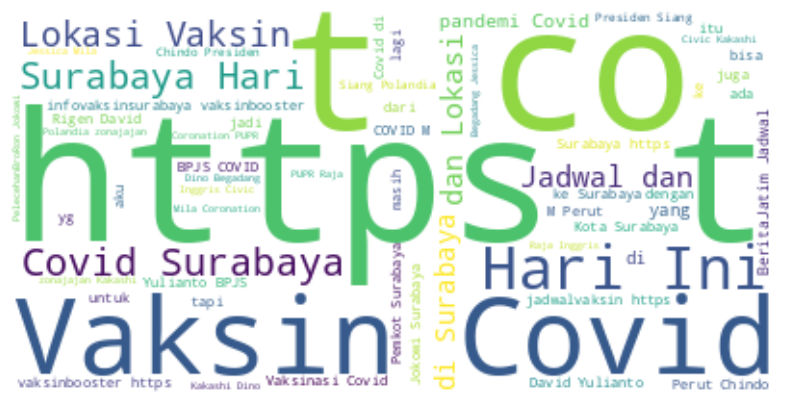

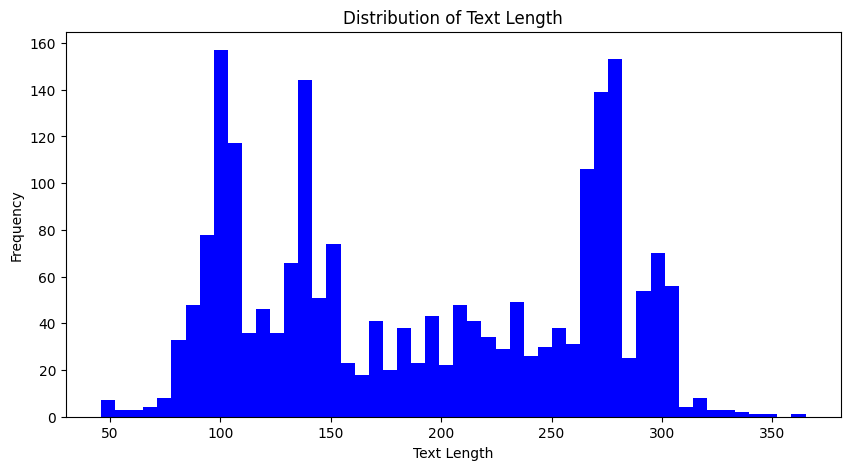

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Drop unnecessary columns
columns_to_drop = ['created_at', 'id_str', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
                   'lang', 'user_id_str', 'conversation_id_str', 'username', 'tweet_url']
data = data.drop(columns=columns_to_drop)

# Generate a word cloud for the 'full_text' column
text = " ".join(review for review in data.full_text)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyze text length
data['text_length'] = data['full_text'].apply(len)
plt.figure(figsize=(10,5))
plt.hist(data['text_length'], bins=50, color='blue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**PREPROCESSING**

In [ ]:
# Clean text

import pandas as pd
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    return text

# Apply the cleaning function to the full_text column
data['cleaned_text'] = data['full_text'].apply(clean_text)

In [ ]:
# Normalize

def normalize_text(text):
    return text.lower()

data['normalized_text'] = data['cleaned_text'].apply(normalize_text)

In [ ]:
# Tokenize

import spacy

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    # Create a spaCy document
    doc = nlp(text)
    # Lemmatize, convert to lower case, and remove stopwords and punctuation
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to the full_text column
data['processed_text'] = data['full_text'].apply(preprocess_text_spacy)

# Display the first few processed texts to check the output
print(data[['full_text', 'processed_text']].head())

# Save the processed data to a new CSV file
data.to_csv('processed_dataset.csv', index=False)

                                           full_text  \
0  Plissss lah Masa w ke surabaya pas covid mulu dah   
1  @dayroraxy @Widino Mutiara yang enak di keluar...   
2  Profil Doni Monardo, Mantan Kepala BNPB dan Ke...   
3  Doni Monardo Mantan Ketua Satgas Covid-19 Berp...   
4  @happppycouple maxim penganti go massage/ go l...   

                                      processed_text  
0  plissss lah masa w ke surabaya pas covid mulu dah  
1  @dayroraxy @widino mutiara yang enak di keluar...  
2  profil doni monardo mantan kepala bnpb dan ket...  
3  doni monardo mantan ketua satgas covid-19 berp...  
4  @happppycouple maxim penganti massage/ life du...  


Most common words: [('surabaya', 2335), ('covid-19', 1256), ('di', 1149), ('pandemi', 1056), ('dan', 959), ('ini', 808), ('hari', 535), ('vaksin', 531), ('jadwal', 458), ('lokasi', 457), ('2023', 398), ('yang', 393), ('tahun', 287), ('vaksinasi', 277), ('ke', 273), ('covid', 262), ('dari', 223), ('beritajatim', 216), ('untuk', 212), ('kota', 209)]


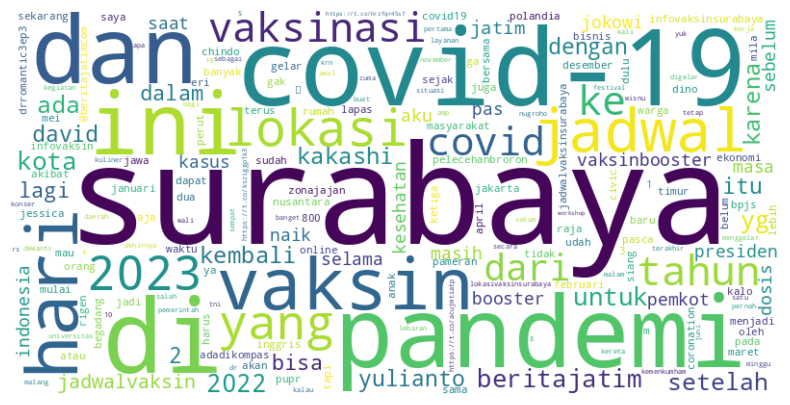

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Count word frequencies
word_freq = Counter(" ".join(data['processed_text']).split())
most_common_words = word_freq.most_common(20)
print("Most common words:", most_common_words)

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**TRAINING MODEL**

In [42]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
processed_data = pd.read_csv('processed_dataset.csv')

# Define the function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Apply the sentiment analysis function to the processed_text column
processed_data['sentiment'] = processed_data['processed_text'].apply(get_sentiment)

# Print to confirm the column is added
print(processed_data.head())

# Save the updated DataFrame with the new 'sentiment' column to a new CSV file
processed_data.to_csv('labeled_processed_dataset.csv', index=False)

                                           full_text  text_length  \
0  Plissss lah Masa w ke surabaya pas covid mulu dah           49   
1  @dayroraxy @Widino Mutiara yang enak di keluar...          175   
2  Profil Doni Monardo, Mantan Kepala BNPB dan Ke...          157   
3  Doni Monardo Mantan Ketua Satgas Covid-19 Berp...           94   
4  @happppycouple maxim penganti go massage/ go l...           90   

                                        cleaned_text  \
0  Plissss lah Masa w ke surabaya pas covid mulu dah   
1  dayroraxy Widino Mutiara yang enak di keluarga...   
2  Profil Doni Monardo Mantan Kepala BNPB dan Ket...   
3  Doni Monardo Mantan Ketua Satgas Covid Berpula...   
4  happppycouple maxim penganti go massage go lif...   

                                     normalized_text  \
0  plissss lah masa w ke surabaya pas covid mulu dah   
1  dayroraxy widino mutiara yang enak di keluarga...   
2  profil doni monardo mantan kepala bnpb dan ket...   
3  doni monardo mantan k

In [43]:
print(processed_data['sentiment'].head())

0    neutral
1    neutral
2    neutral
3    neutral
4    neutral
Name: sentiment, dtype: object


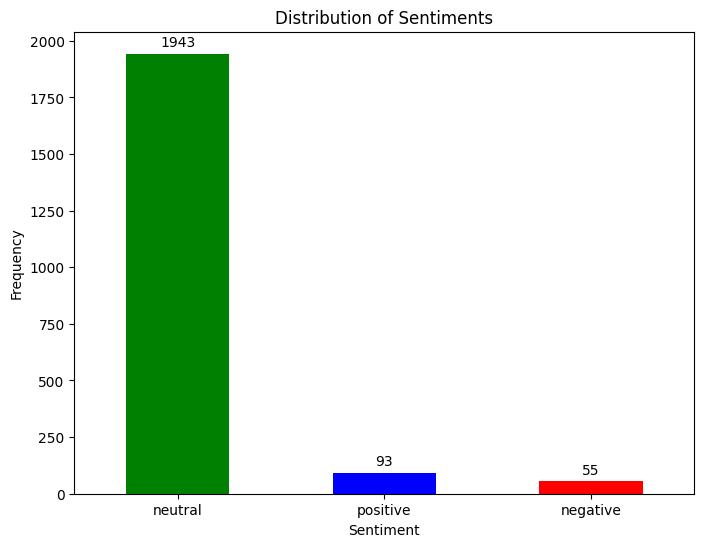

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
processed_data = pd.read_csv('labeled_processed_dataset.csv')

# Count the frequency of each sentiment
sentiment_counts = processed_data['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add text annotations above the bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),  # Format the number as an integer
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text
                 ha='center', va='center',  # Center alignment
                 size=10, xytext=(0, 8),  # Size of the text and vertical offset
                 textcoords='offset points')

plt.show()

Dari hasil analisis sentimen yang dilakukan pada dataset, didapati bahwa mayoritas teks diklasifikasikan sebagai netral dengan jumlah yang signifikan, yaitu 1,943 teks. Hal ini menunjukkan bahwa sebagian besar konten dalam dataset cenderung tidak mengekspresikan emosi yang kuat atau mendalam, yang bisa menandakan bahwa teks-teks tersebut berisi informasi yang bersifat faktual atau deskriptif tanpa menyertakan pendapat atau emosi pribadi.

Jumlah teks dengan sentimen positif mencapai 93, sedangkan yang negatif ada 55. Proporsi sentimen positif yang lebih besar dibandingkan dengan negatif bisa mengindikasikan bahwa meskipun reaksi emosional terhadap topik yang dibahas tidak sering muncul, ketika muncul, teks cenderung memiliki nada yang lebih positif. Hal ini bisa menunjukkan adanya pandangan yang umumnya lebih optimis atau dukungan terhadap topik yang dibahas dalam dataset tersebut.

## Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Feature Extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(processed_data['processed_text'])
y = processed_data['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9284009546539379
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        14
     neutral       0.93      1.00      0.96       389
    positive       0.00      0.00      0.00        16

    accuracy                           0.93       419
   macro avg       0.31      0.33      0.32       419
weighted avg       0.86      0.93      0.89       419





> Hyperparameter Tuning



In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Different algorithms
    'max_iter': [100, 200, 300]  # Maximum number of iterations to converge
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))
print("Improved Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}
Best cross-validation score: 0.95
Improved Accuracy: 0.9379474940334129
Improved Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.36      0.53        14
     neutral       0.94      0.99      0.97       389
    positive       0.40      0.12      0.19        16

    accuracy                           0.94       419
   macro avg       0.78      0.49      0.56       419
weighted avg       0.92      0.94      0.92       419



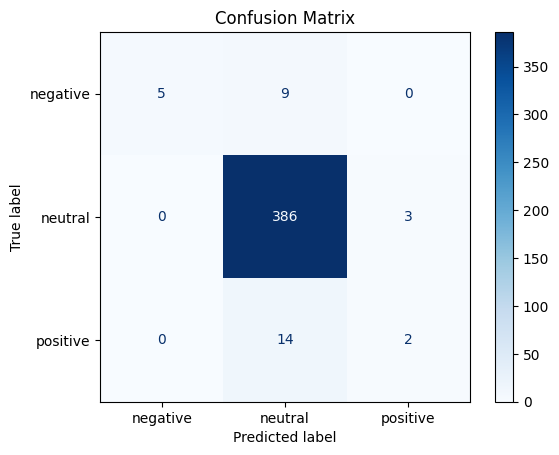

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Bernoulli NB

In [49]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Train the Bernoulli Naive Bayes model
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)

# Evaluate the model
y_pred_bernoulli = bernoulli_model.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
report_bernoulli = classification_report(y_test, y_pred_bernoulli)

print("Accuracy with BernoulliNB:", accuracy_bernoulli)
print("Classification Report with BernoulliNB:\n", report_bernoulli)

Accuracy with BernoulliNB: 0.847255369928401
Classification Report with BernoulliNB:
               precision    recall  f1-score   support

    negative       0.25      0.07      0.11        14
     neutral       0.96      0.89      0.92       389
    positive       0.15      0.50      0.23        16

    accuracy                           0.85       419
   macro avg       0.45      0.49      0.42       419
weighted avg       0.90      0.85      0.87       419



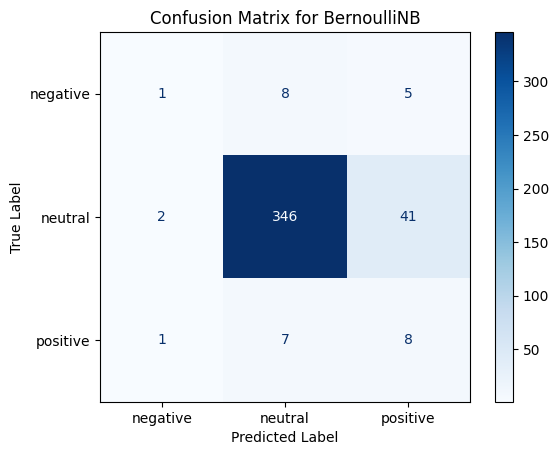

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

# Visualize the confusion matrix using Matplotlib and ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bernoulli, display_labels=bernoulli_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for BernoulliNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()